In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
raw_df = pd.read_csv('cardiovascular_risk.csv')

In [6]:
raw_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [7]:
df = raw_df.copy()

In [8]:
df.drop(columns=['education','id'],inplace = True)

In [9]:
df.shape

(3390, 15)

In [10]:
df.describe()

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,49.542183,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,70.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   sex              3390 non-null   object 
 2   is_smoking       3390 non-null   object 
 3   cigsPerDay       3368 non-null   float64
 4   BPMeds           3346 non-null   float64
 5   prevalentStroke  3390 non-null   int64  
 6   prevalentHyp     3390 non-null   int64  
 7   diabetes         3390 non-null   int64  
 8   totChol          3352 non-null   float64
 9   sysBP            3390 non-null   float64
 10  diaBP            3390 non-null   float64
 11  BMI              3376 non-null   float64
 12  heartRate        3389 non-null   float64
 13  glucose          3086 non-null   float64
 14  TenYearCHD       3390 non-null   int64  
dtypes: float64(8), int64(5), object(2)
memory usage: 397.4+ KB


In [12]:
def missing_values(df):

  total_missing_value = df.isna().sum()
  percent_missing_value = total_missing_value*100/len(df)

  table = pd.concat([total_missing_value,percent_missing_value],axis = 1)
  table.rename(columns = {0:'missing values',1:'percent of missing values'},inplace = True)
  missing_values_table = table.sort_values('percent of missing values',ascending = False).round(1)

  return missing_values_table

In [13]:
missing_values(df)

,missing values,percent of missing values
glucose,304,9.0
BPMeds,44,1.3
totChol,38,1.1
cigsPerDay,22,0.6
BMI,14,0.4
heartRate,1,0.0
age,0,0.0
prevalentHyp,0,0.0
prevalentStroke,0,0.0
sex,0,0.0


In [14]:
df.dropna(axis=0, inplace=True)

In [15]:
numeric_features = df.describe().columns
numeric_features

Index(['age', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
       'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose',
       'TenYearCHD'],
      dtype='object')

In [16]:
categorical_features = df.describe(include=['object','category']).columns
categorical_features

Index(['sex', 'is_smoking'], dtype='object')

In [17]:
df['TenYearCHD'].value_counts()

TenYearCHD
0    2547
1     457
Name: count, dtype: int64

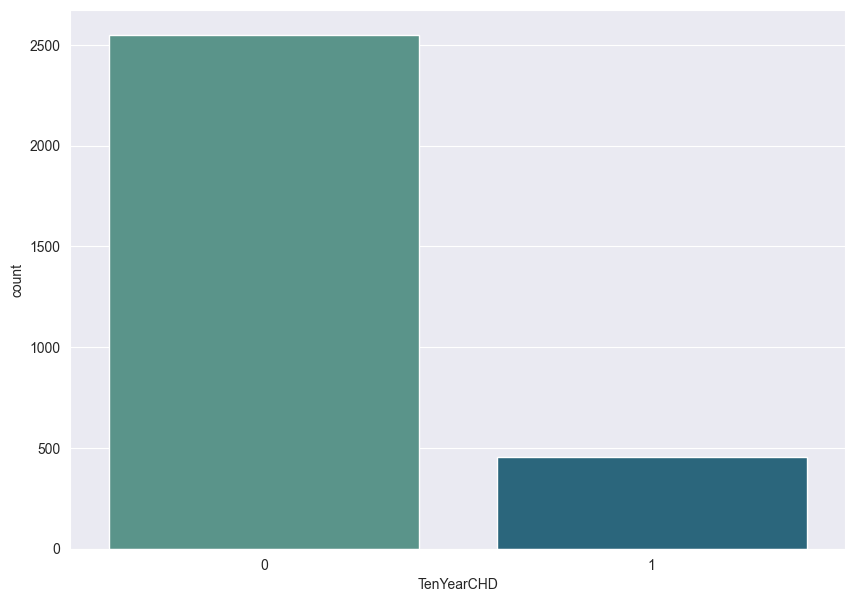

In [18]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.countplot(x='TenYearCHD',data=df,palette='crest')
plt.show()

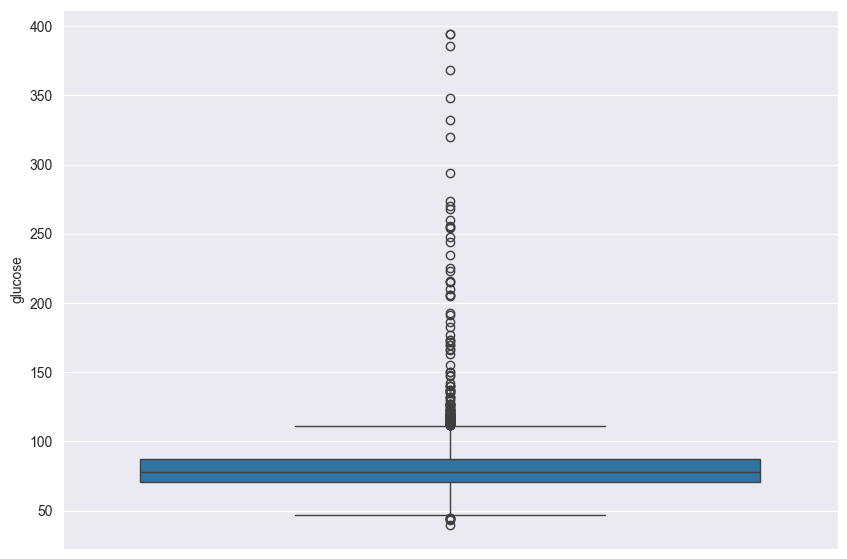

In [19]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.boxplot(df['glucose'], orient='horizontal')
plt.show()
     

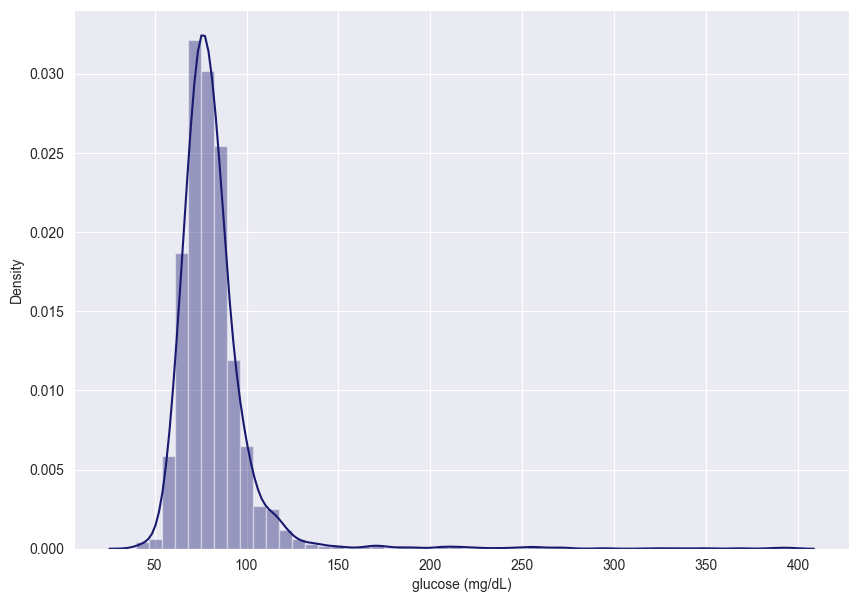

In [20]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.distplot(df['glucose'],color="midnightblue")
plt.xlabel('glucose (mg/dL)')
plt.show()

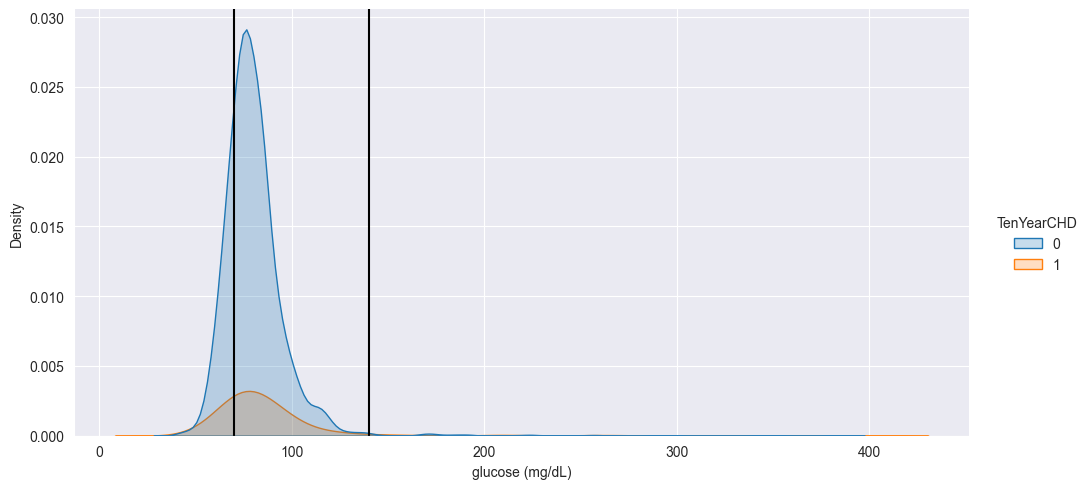

In [21]:
sns.displot(data=df, x='glucose', hue='TenYearCHD', kind='kde', fill=True, height=5, aspect=2)
plt.axvline(70, 0,1,color='black')
plt.axvline(140, 0,1,color='black')
plt.xlabel('glucose (mg/dL)')
plt.show()

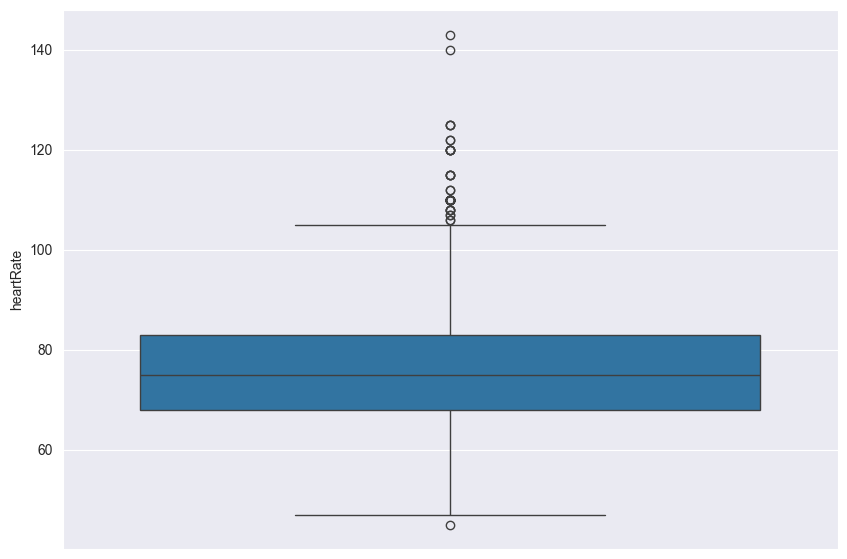

In [22]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.boxplot(df['heartRate'], orient='horizontal')
plt.show()

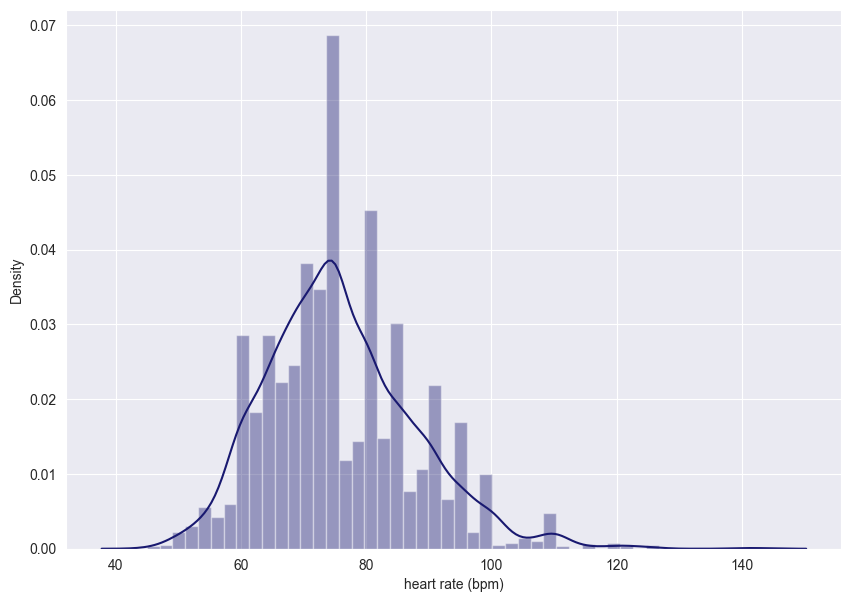

In [23]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.distplot(df['heartRate'],color="midnightblue")
plt.xlabel('heart rate (bpm)')
plt.show()

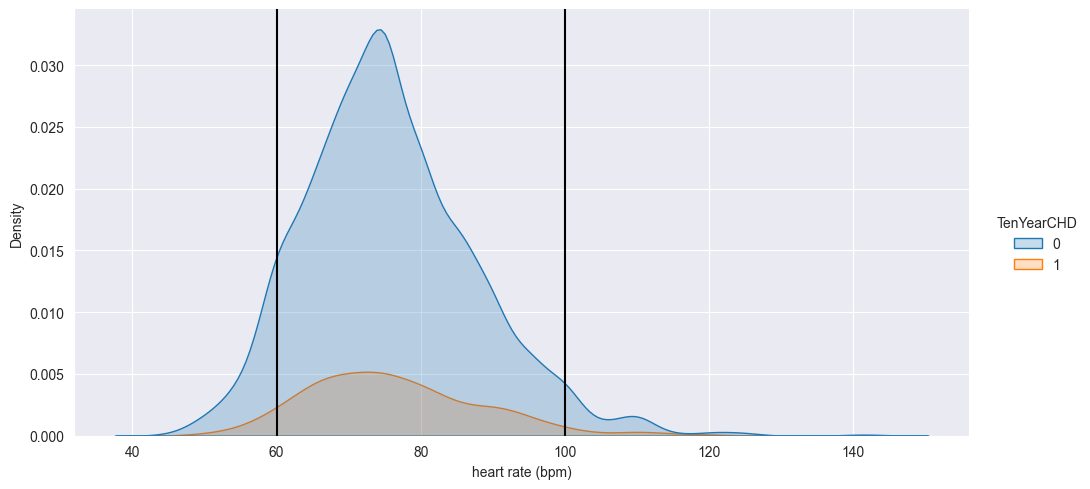

In [24]:
sns.displot(data=df, x='heartRate', hue='TenYearCHD', kind='kde', fill=True, height=5, aspect=2)
plt.axvline(60, 0,1,color='black')
plt.axvline(100, 0,1,color='black')
plt.xlabel('heart rate (bpm)')
plt.show()

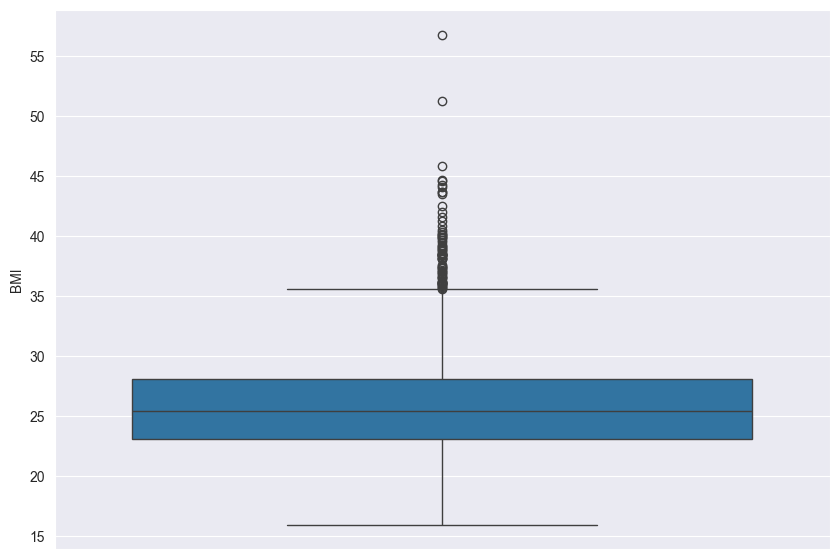

In [25]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.boxplot(df['BMI'], orient='horizontal')
plt.show()

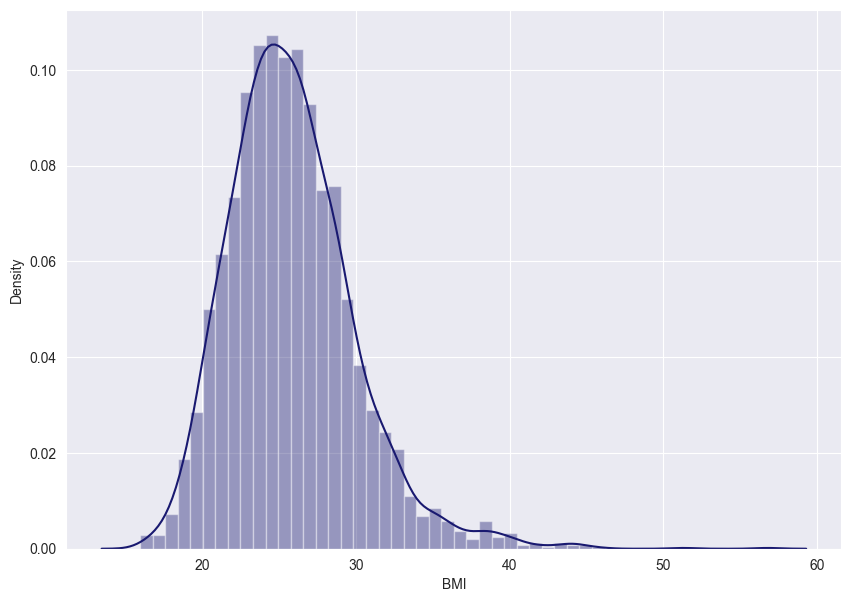

In [26]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.distplot(df['BMI'],color="midnightblue")
plt.show()

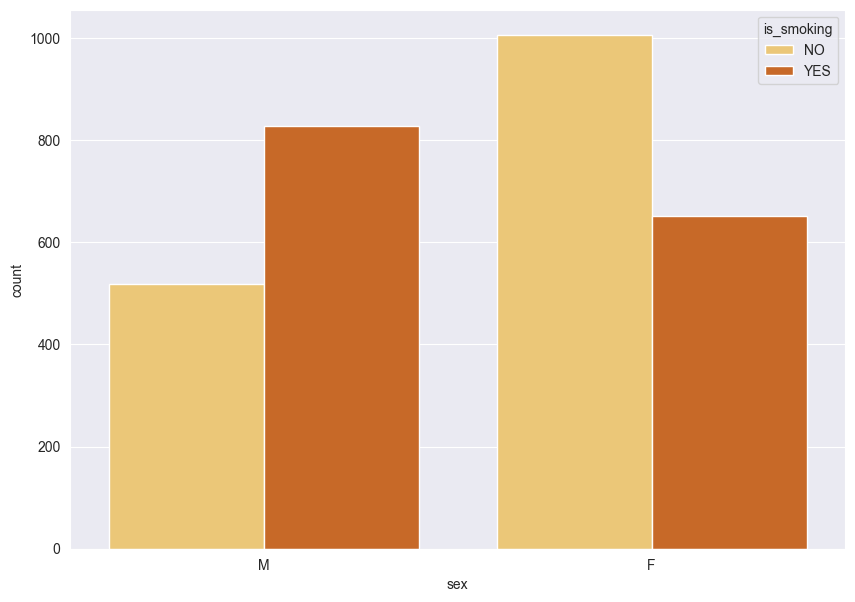

In [28]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.countplot(x='sex',data=df,hue='is_smoking',palette='YlOrBr')
plt.show()
     

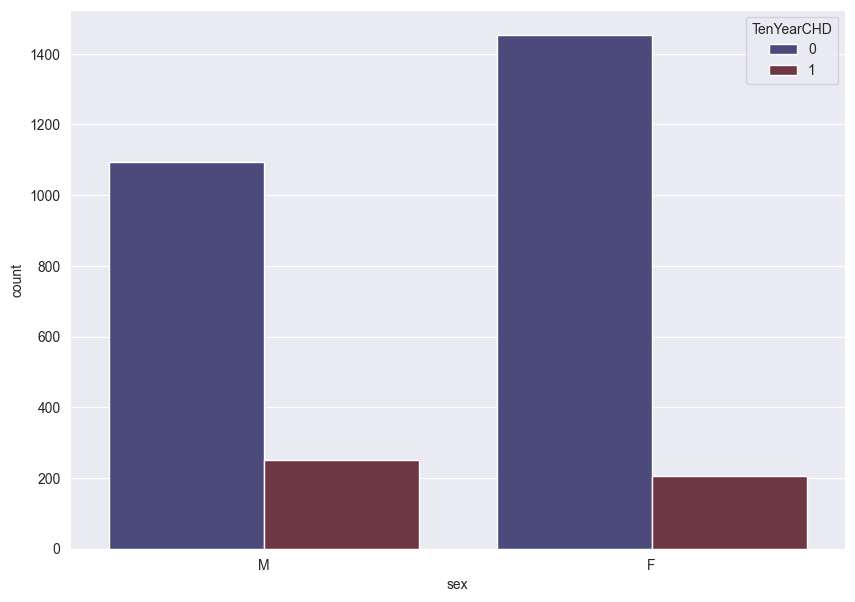

In [29]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.countplot(x='sex',data=df,hue='TenYearCHD',palette='icefire')
plt.show()

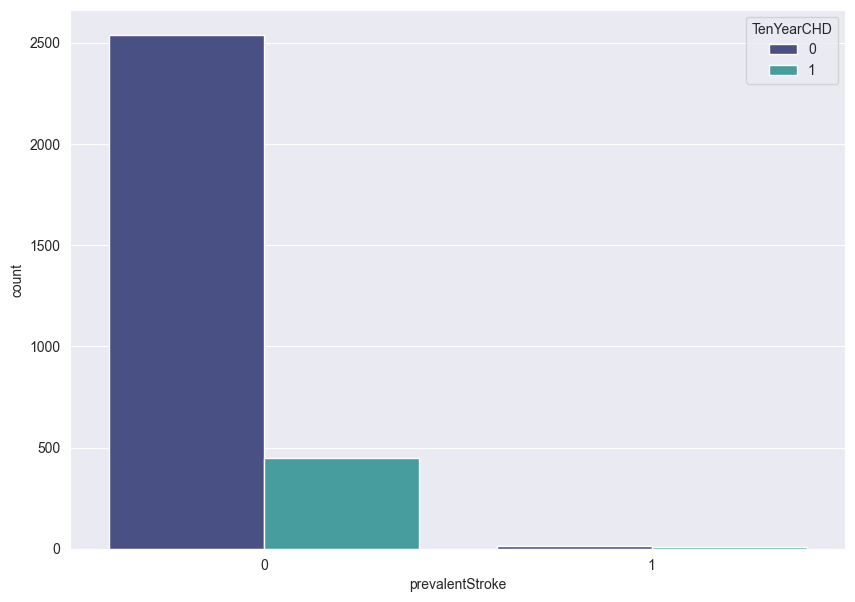

In [30]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.countplot(x='prevalentStroke',hue='TenYearCHD',data=df,palette='mako')
plt.show()

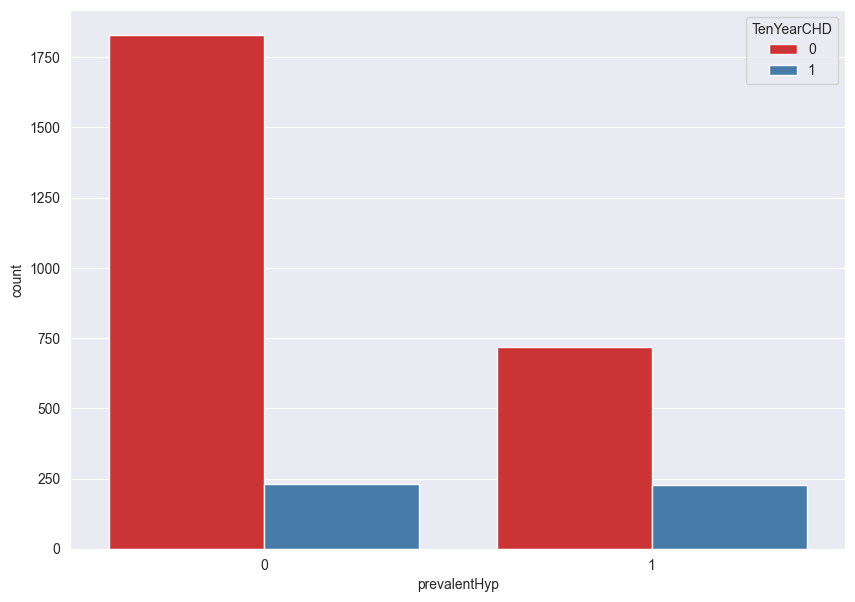

In [31]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.countplot(x='prevalentHyp',hue='TenYearCHD',data=df,palette='Set1')
plt.show()

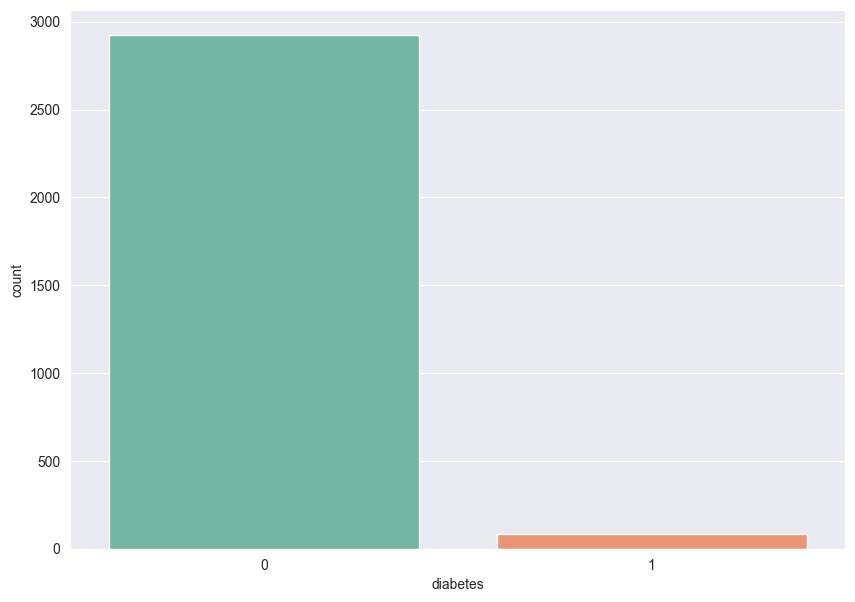

In [32]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.countplot(x='diabetes',data=df,palette='Set2')
plt.show()

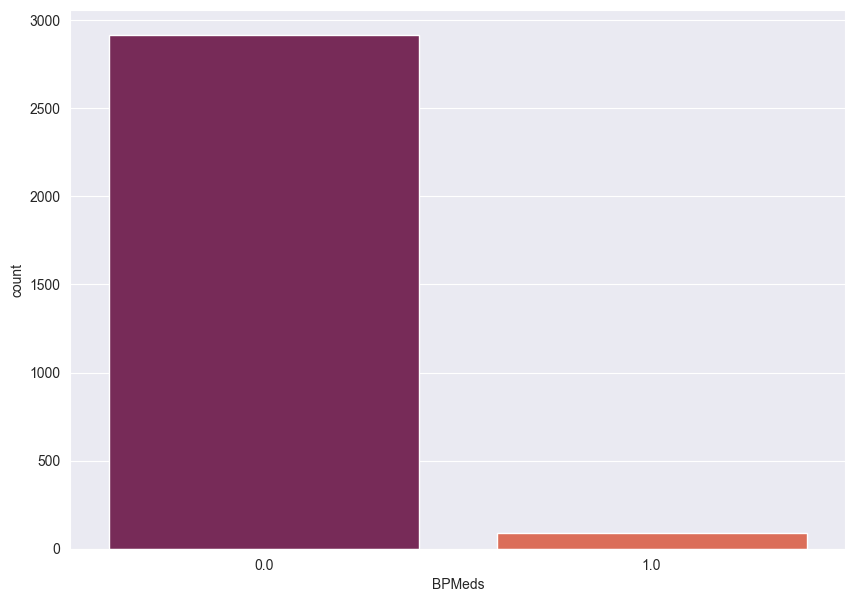

In [33]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.countplot(x='BPMeds',data=df,palette='rocket')
plt.show()

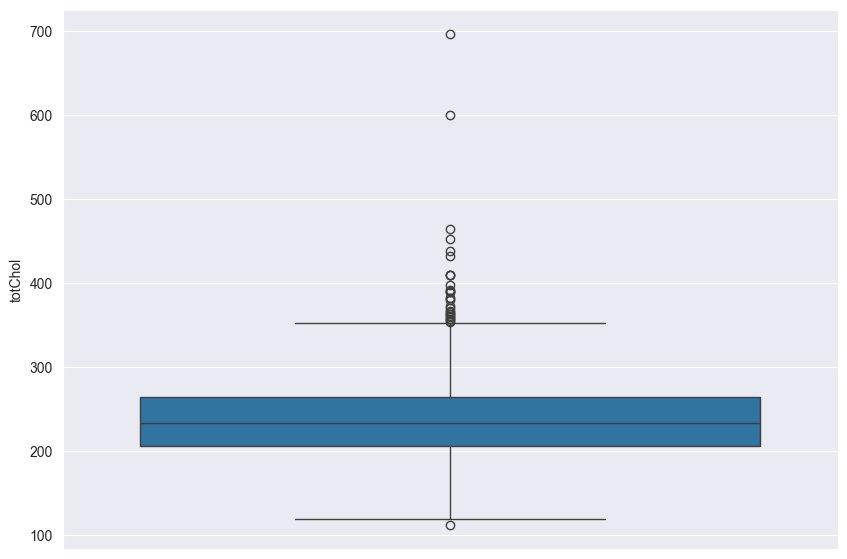

In [34]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.boxplot(df['totChol'], orient='horizontal')
plt.show()

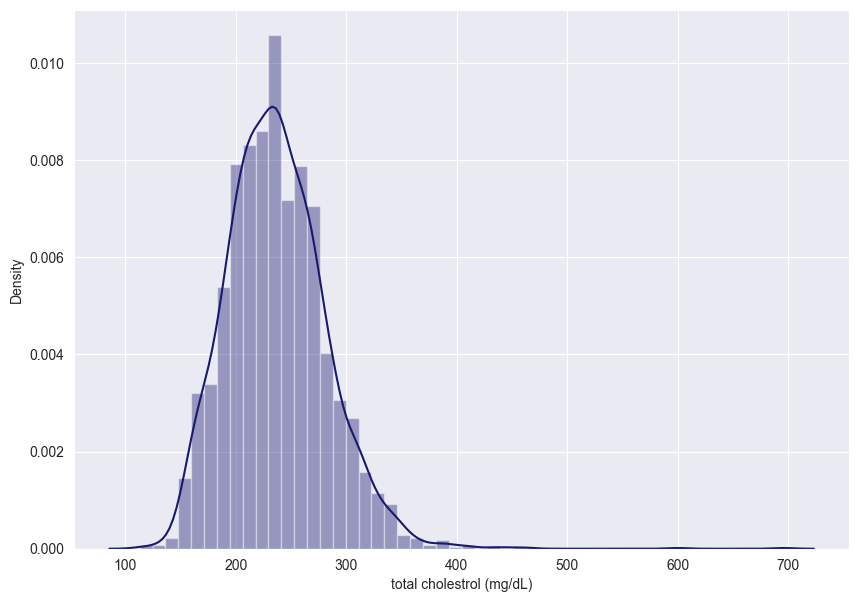

In [35]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.distplot(df['totChol'],color="midnightblue")
plt.xlabel('total cholestrol (mg/dL)')
plt.show()

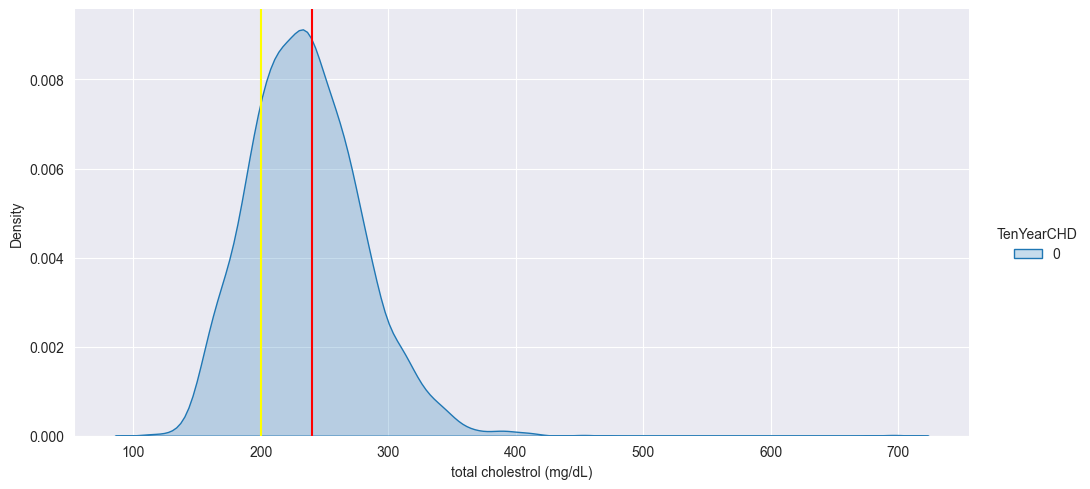

In [36]:
zero_tc = df[df['TenYearCHD']==0]
sns.displot(data=zero_tc, x='totChol', hue='TenYearCHD', kind='kde', fill=True, height=5, aspect=2)
plt.axvline(200, 0,1,color='yellow')
plt.axvline(240, 0,1,color='red')
plt.xlabel('total cholestrol (mg/dL)')
plt.show()

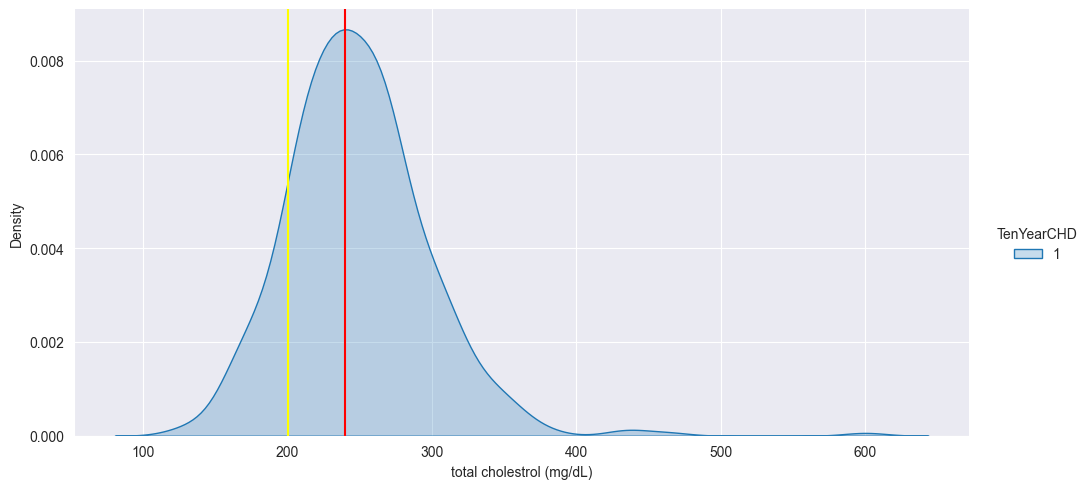

In [37]:
one_tc = df[df['TenYearCHD']==1]
sns.displot(data=one_tc, x='totChol', hue='TenYearCHD', kind='kde', fill=True, height=5, aspect=2)
plt.axvline(200, 0,1,color='yellow')
plt.axvline(240, 0,1,color='red')
plt.xlabel('total cholestrol (mg/dL)')
plt.show()

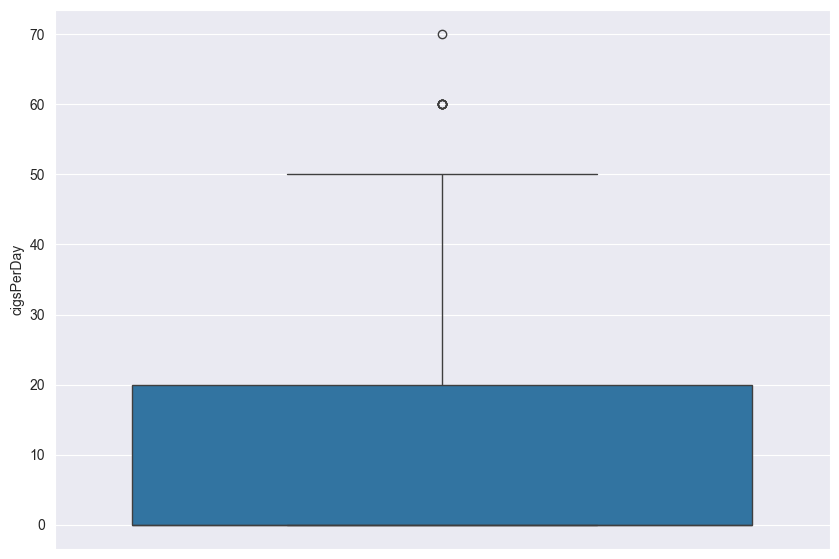

In [38]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.boxplot(df['cigsPerDay'], orient='horizontal')
plt.show()
     

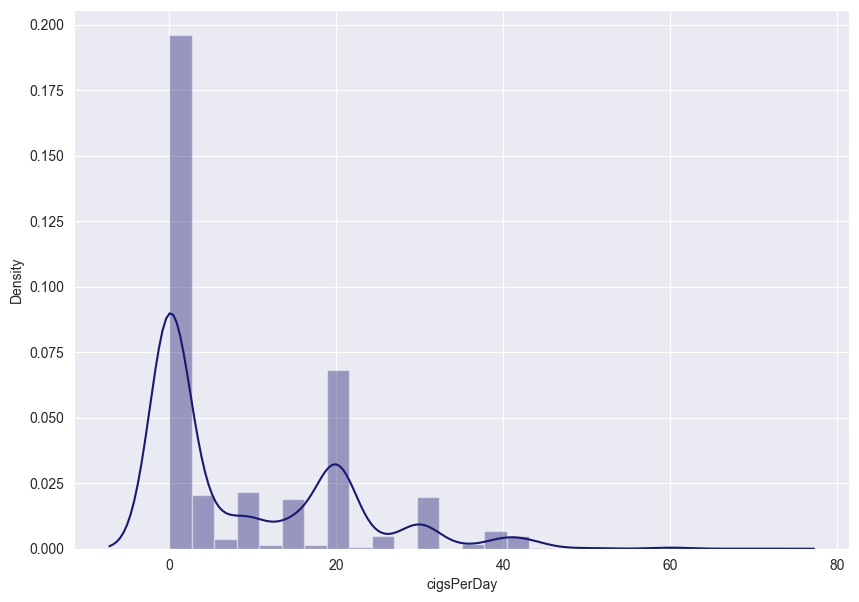

In [39]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.distplot(df['cigsPerDay'],color="midnightblue")
plt.show()

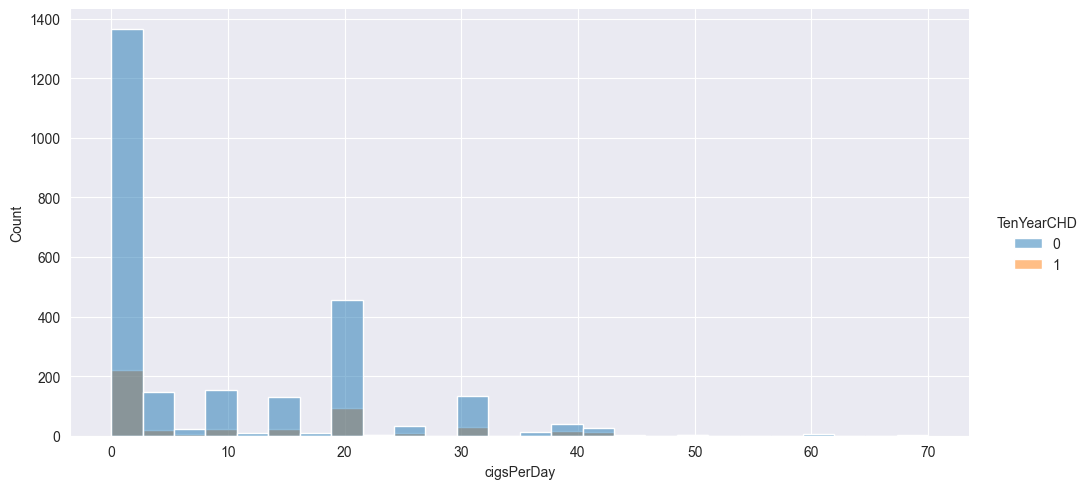

In [40]:
sns.displot(data=df, x='cigsPerDay', hue='TenYearCHD', fill=True, height=5, aspect=2)
plt.show()

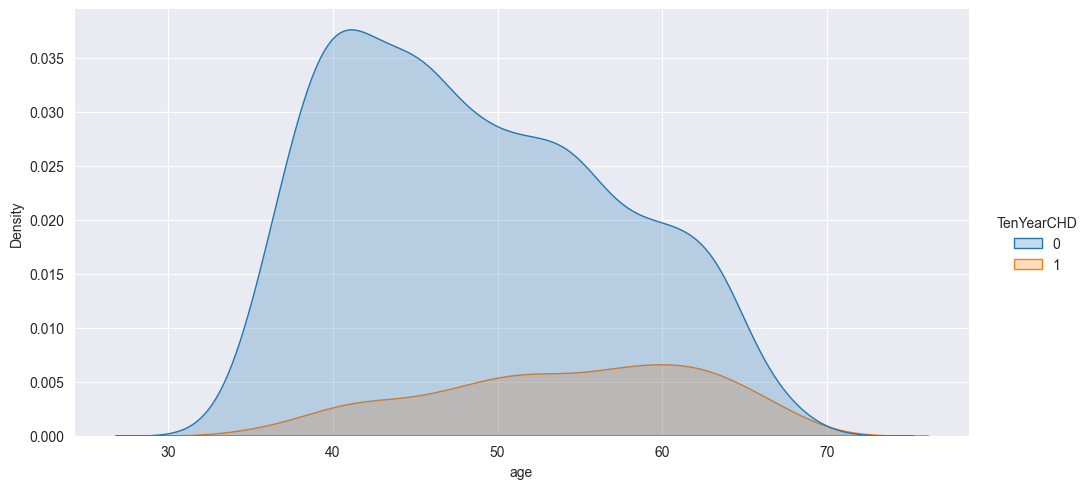

In [41]:
sns.displot(data=df, x='age', hue='TenYearCHD', kind='kde', fill=True, height=5, aspect=2)
plt.show()

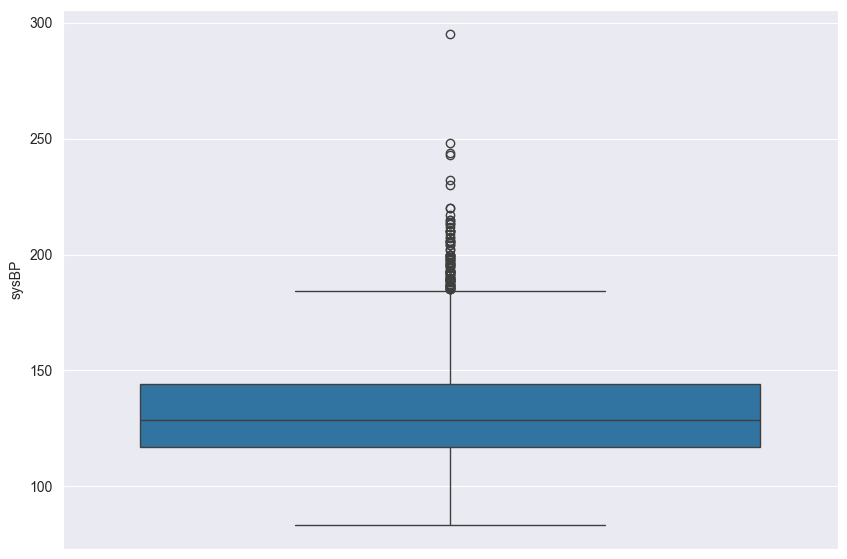

In [42]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.boxplot(df['sysBP'], orient='horizontal')
plt.show()

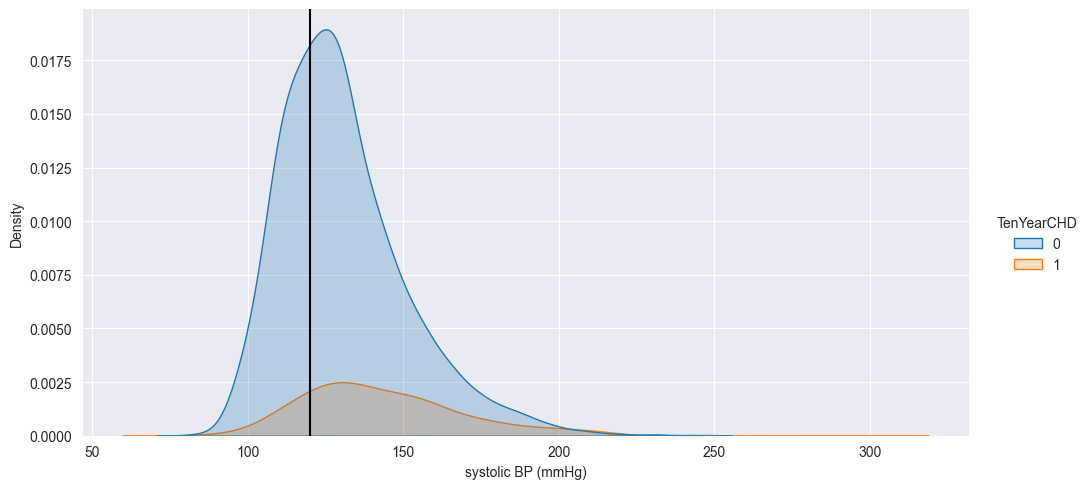

In [43]:
sns.displot(data=df, x='sysBP', hue='TenYearCHD', kind='kde', fill=True, height=5, aspect=2)
plt.axvline(120, 0,1,color='black')
plt.xlabel('systolic BP (mmHg)')
plt.show()

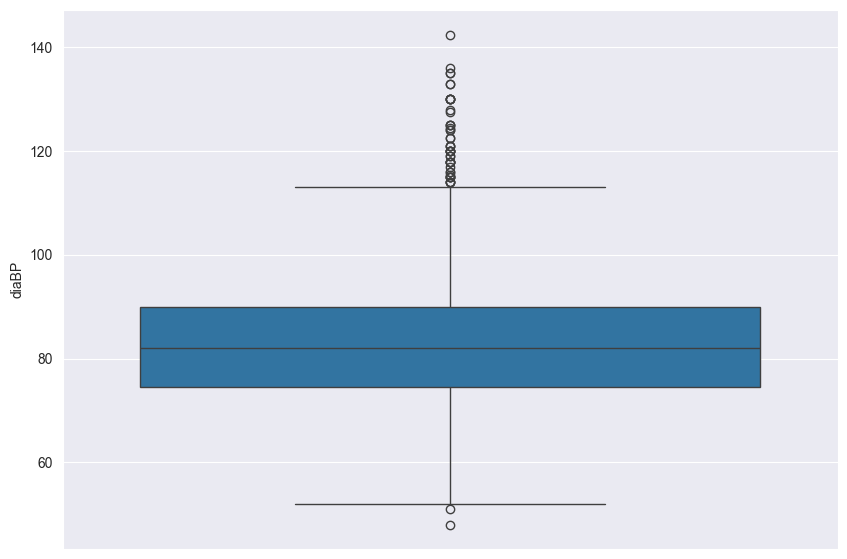

In [44]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.boxplot(df['diaBP'], orient='horizontal')
plt.show()

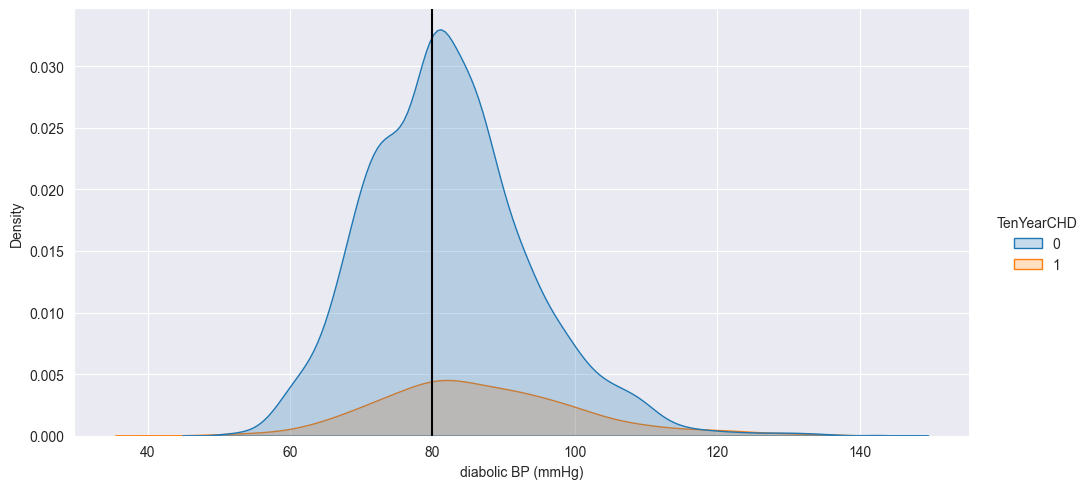

In [45]:
sns.displot(data=df, x='diaBP', hue='TenYearCHD', kind='kde', fill=True, height=5, aspect=2)
plt.axvline(80, 0,1,color='black')
plt.xlabel('diabolic BP (mmHg)')
plt.show()

In [48]:
df.columns

Index(['age', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
       'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose',
       'TenYearCHD', 'sex_F', 'sex_M', 'is_smoking_NO', 'is_smoking_YES'],
      dtype='object')

In [49]:
df.head()

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex_F,sex_M,is_smoking_NO,is_smoking_YES
1,36,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,False,True,True,False
2,46,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,True,False,False,True
3,50,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,False,True,False,True
4,64,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,True,False,False,True
5,61,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1,True,False,True,False


In [50]:
features = ['age', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
       'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose',
        'sex_F', 'sex_M', 'is_smoking_NO', 'is_smoking_YES']

In [51]:
df.shape

(3004, 17)

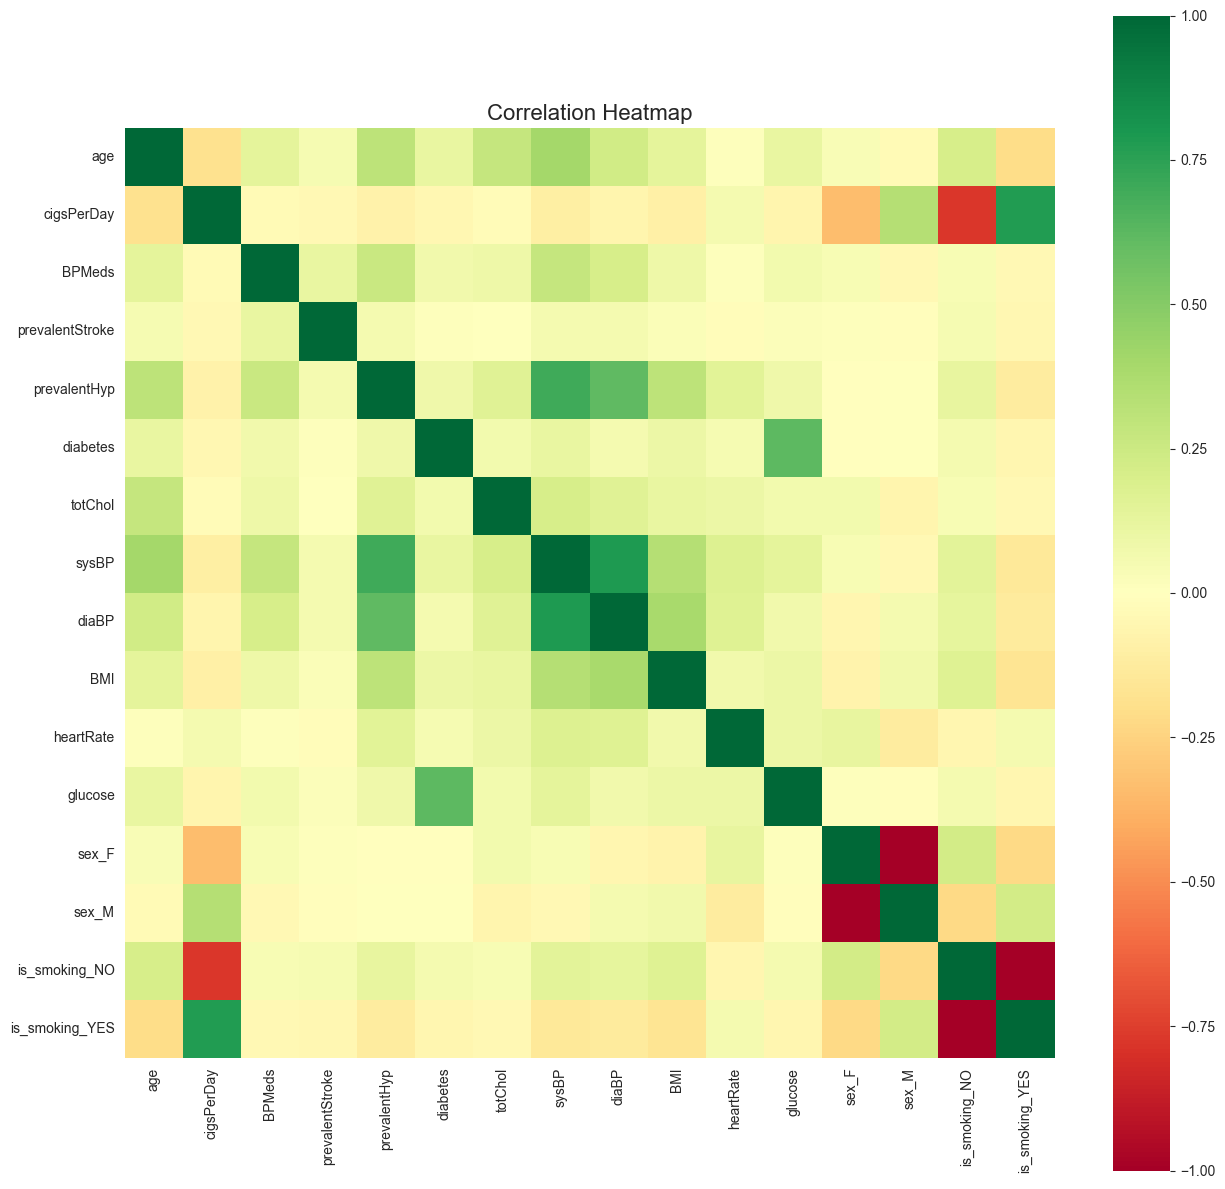

In [52]:
df_corr = df.drop(labels='TenYearCHD',axis=1)
correlation = df_corr.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation, cmap='RdYlGn', vmin=-1, vmax=1, square=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [55]:

from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_smote, y_smote = smote.fit_resample(df[features], df['TenYearCHD'])

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 3004
Resampled dataset shape 5094


In [56]:
df_new = pd.concat([x_smote,y_smote], axis=1)

In [57]:
df_new.head()

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,sex_F,sex_M,is_smoking_NO,is_smoking_YES,TenYearCHD
0,36,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,False,True,True,False,0
1,46,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,True,False,False,True,0
2,50,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,False,True,False,True,1
3,64,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,True,False,False,True,0
4,61,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,True,False,True,False,1


In [58]:
df_new.shape

(5094, 17)

In [59]:
df_new['TenYearCHD'].value_counts()

TenYearCHD
0    2547
1    2547
Name: count, dtype: int64

In [60]:
X = df_new[features]
y = df_new.iloc[:,-1]


In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123,stratify=y)

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
scaler = StandardScaler()

scaled_train_X = scaler.fit_transform(X_train)
X_train = pd.DataFrame(scaled_train_X)

scaled_test_X = scaler.transform(X_test)
X_test = pd.DataFrame(scaled_test_X)

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve
from sklearn.neighbors import KNeighborsClassifier

In [65]:
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test) 

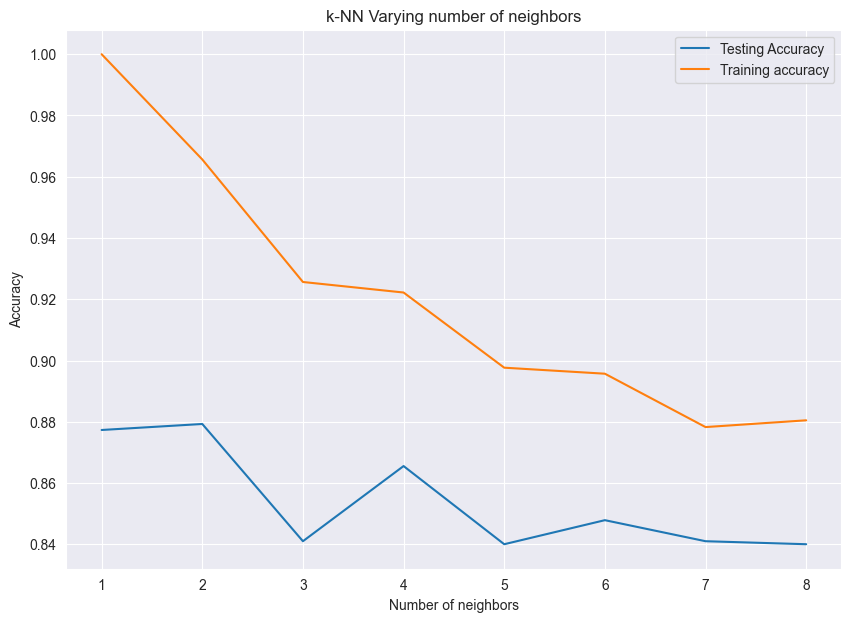

In [66]:
plt.figure(figsize=(10,7))
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [67]:
knn = KNeighborsClassifier(n_neighbors=1)

In [68]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [69]:
y_knn_pred = knn.predict(X_test)

In [70]:
knn_acc = accuracy_score(y_test,y_knn_pred)
print(f"Using k-nearest neighbours we get an accuracy of {round(knn_acc*100,2)}%")

Using k-nearest neighbours we get an accuracy of 87.73%


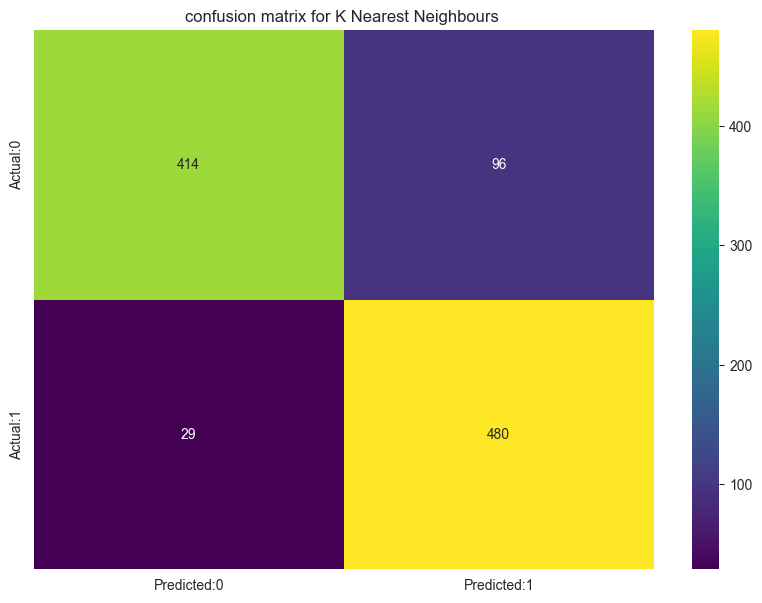

In [71]:
conf_mat = confusion_matrix(y_test,y_knn_pred)
conf_matrix=pd.DataFrame(data=conf_mat,index=['Actual:0','Actual:1'],columns=['Predicted:0','Predicted:1'])
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='viridis')
plt.title('confusion matrix for K Nearest Neighbours ')
plt.show()

In [72]:
print(classification_report(y_test,y_knn_pred))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87       510
           1       0.83      0.94      0.88       509

    accuracy                           0.88      1019
   macro avg       0.88      0.88      0.88      1019
weighted avg       0.88      0.88      0.88      1019



In [73]:
knn_f1_score = f1_score(y_test, y_knn_pred)
print(f'The f1 score for K nearest neignbours is {round(knn_f1_score*100,2)}%')

The f1 score for K nearest neignbours is 88.48%


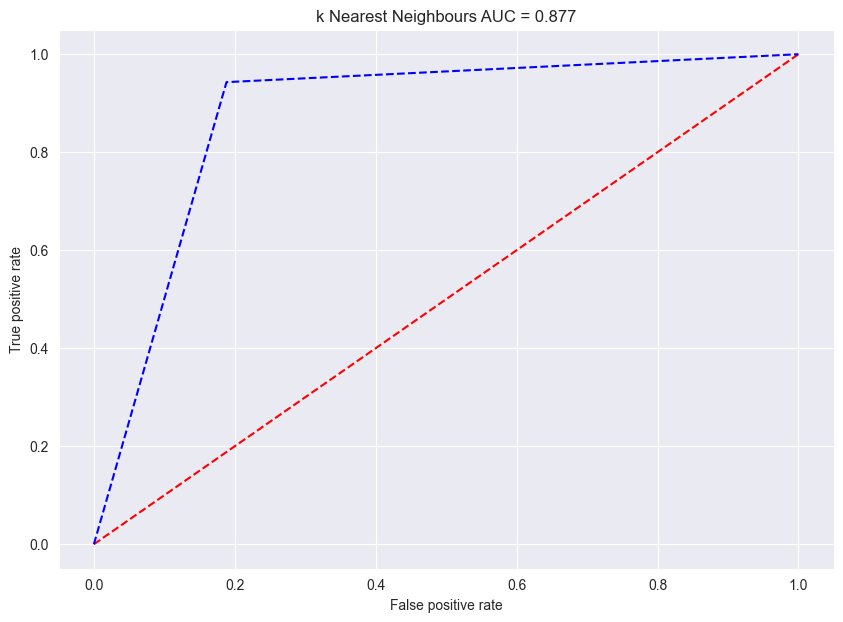

In [74]:
probability = knn.predict_proba(X_test)

probability = probability[:, 1]

knn_auc = roc_auc_score(y_test, probability)
fpr, tpr, thresh = roc_curve(y_test, probability)

# plot curve
sns.set_style('darkgrid')
plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], linestyle='--',color='red')
plt.plot(fpr, tpr,linestyle='--',color='blue')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"k Nearest Neighbours AUC = {round(knn_auc,3)}")
plt.show()

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [81]:
dt_classifier = DecisionTreeClassifier(random_state=0,max_features='sqrt', min_samples_leaf=1, min_samples_split=3)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_features='sqrt', min_samples_split=3, random_state=0)

In [82]:
y_dt_pred = dt_classifier.predict(X_test)

dt_acc = accuracy_score(y_test,y_dt_pred)
print(f"Using Decision Tree we get an accuracy of {round(dt_acc*100,2)}%")

Using Decision Tree we get an accuracy of 79.49%


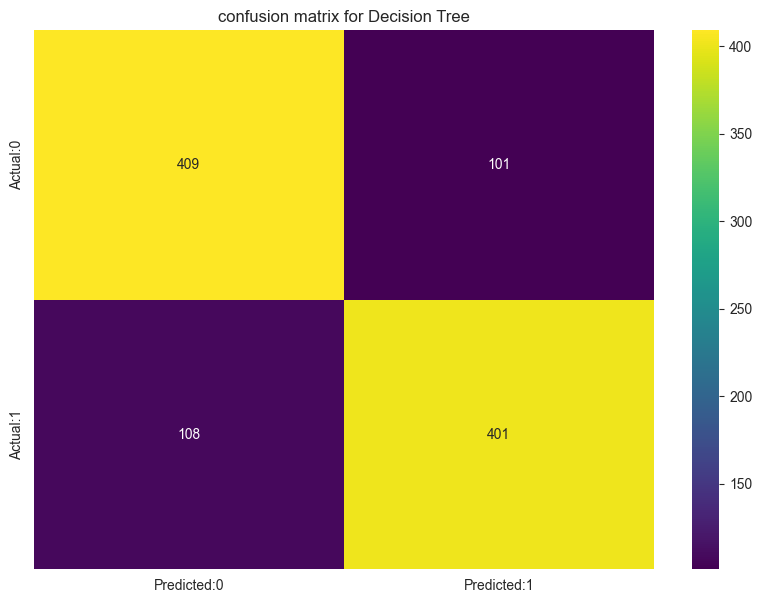

In [83]:
conf_mat = confusion_matrix(y_test,y_dt_pred)
conf_matrix=pd.DataFrame(data=conf_mat,index=['Actual:0','Actual:1'],columns=['Predicted:0','Predicted:1'])
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='viridis')
plt.title('confusion matrix for Decision Tree')
plt.show()

In [84]:
print(classification_report(y_test,y_dt_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80       510
           1       0.80      0.79      0.79       509

    accuracy                           0.79      1019
   macro avg       0.79      0.79      0.79      1019
weighted avg       0.79      0.79      0.79      1019



In [85]:
dt_f1_score = f1_score(y_test, y_dt_pred)
print(f'The f1 score for decision tree classifier is {round(dt_f1_score*100,2)}%')

The f1 score for decision tree classifier is 79.33%


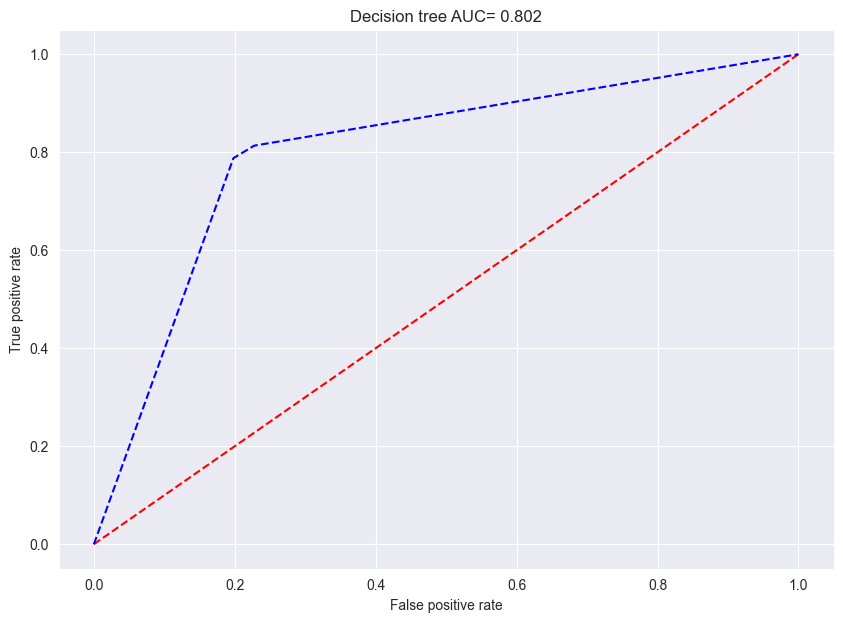

In [86]:
#predict probability of the target variable
probability = dt_classifier.predict_proba(X_test)
probability = probability[:, 1]
dt_auc = roc_auc_score(y_test, probability)
fpr, tpr, thresh = roc_curve(y_test, probability)

# plot curve
sns.set_style('darkgrid')
plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], linestyle='--',color='red')
plt.plot(fpr, tpr,linestyle='--',color='blue')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"Decision tree AUC= {round(dt_auc,3)}")
plt.show()

In [95]:
from sklearn.ensemble import RandomForestClassifier
params = {
    'bootstrap': [True],
    'max_depth': [15,18,20,25,30],
    'max_features': ['sqrt'],
    'min_samples_split': [2,4,6,8,10],
    'max_samples':[0.8],
    'n_estimators': [50,80,100]
}

rf_classifier = GridSearchCV(RandomForestClassifier(), param_grid=params, n_jobs=-1)

In [96]:
rf_classifier.fit(X_train,y_train)
rf_classifier.best_params_

{'bootstrap': True,
 'max_depth': 25,
 'max_features': 'sqrt',
 'max_samples': 0.8,
 'min_samples_split': 2,
 'n_estimators': 80}

In [97]:
y_rf_pred = rf_classifier.predict(X_test)

In [98]:
#check accuracy
rf_acc = accuracy_score(y_test,y_rf_pred)
print(f"Using Random forest we get an accuracy of {round(rf_acc*100,2)}%")

Using Random forest we get an accuracy of 88.32%


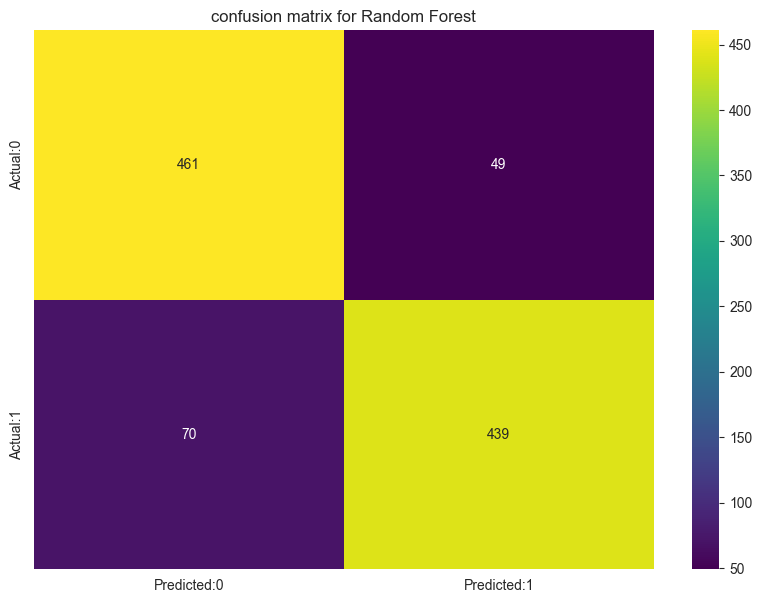

In [99]:
conf_mat = confusion_matrix(y_test,y_rf_pred)
conf_matrix=pd.DataFrame(data=conf_mat,index=['Actual:0','Actual:1'],columns=['Predicted:0','Predicted:1'])
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='viridis')
plt.title('confusion matrix for Random Forest')
plt.show()

In [100]:
#classification report
print(classification_report(y_test,y_rf_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89       510
           1       0.90      0.86      0.88       509

    accuracy                           0.88      1019
   macro avg       0.88      0.88      0.88      1019
weighted avg       0.88      0.88      0.88      1019



In [101]:
rf_f1_score = f1_score(y_test, y_rf_pred)
print(f'The f1 score for random forest classifier is {round(rf_f1_score*100,2)}%')

The f1 score for random forest classifier is 88.06%


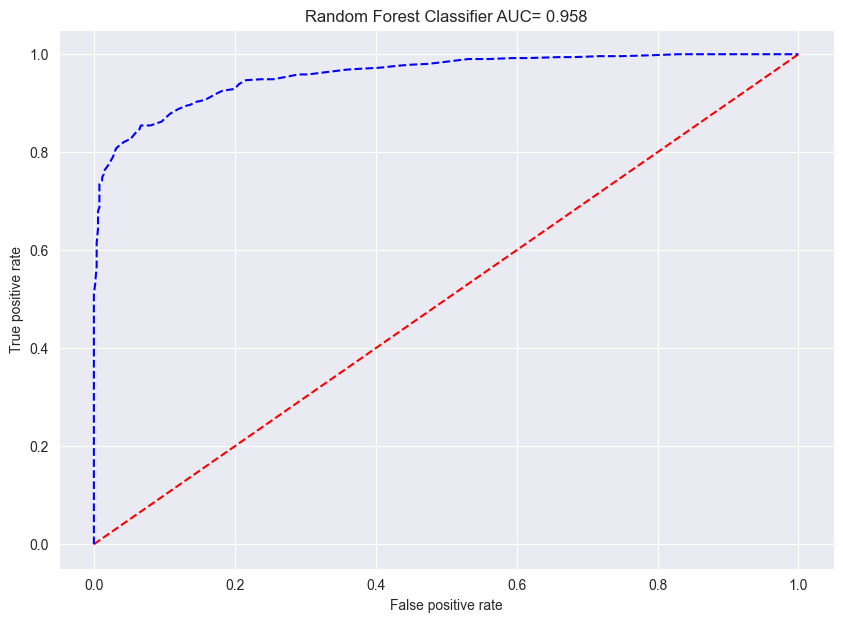

In [102]:
#predict probability of the target variable
probability = rf_classifier.predict_proba(X_test)
probability = probability[:, 1]
rf_auc = roc_auc_score(y_test, probability)
fpr, tpr, thresh = roc_curve(y_test, probability)

# plot curve
sns.set_style('darkgrid')
plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], linestyle='--',color='red')
plt.plot(fpr, tpr,linestyle='--',color='blue')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"Random Forest Classifier AUC= {round(rf_auc,3)}")
plt.show()

In [105]:
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [136]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [137]:
df_new.head()

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,sex_F,sex_M,is_smoking_NO,is_smoking_YES,TenYearCHD
0,36,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,False,True,True,False,0
1,46,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,True,False,False,True,0
2,50,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,False,True,False,True,1
3,64,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,True,False,False,True,0
4,61,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,True,False,True,False,1


In [138]:
df_log = df_new.copy()
df_log = df_log.drop(columns=['sysBP','diaBP','BMI','age','heartRate','TenYearCHD','glucose'])

In [140]:
df_log.columns

Index(['cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes',
       'totChol', 'sex_F', 'sex_M', 'is_smoking_NO', 'is_smoking_YES'],
      dtype='object')

In [141]:
features = ['cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes',
       'totChol', 'sex_F', 'sex_M', 'is_smoking_NO', 'is_smoking_YES']
     

In [142]:
X = df_log[features]
y = df_new.iloc[:,-1]

In [143]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123,stratify=y)

In [144]:
scaler = StandardScaler()

scaled_train_X = scaler.fit_transform(X_train)
X_train = pd.DataFrame(scaled_train_X)

scaled_test_X = scaler.transform(X_test)
X_test = pd.DataFrame(scaled_test_X)

In [145]:
parameters = {'solver':['newton-cg', 'lbfgs', 'liblinear'],
          'C':[100, 10, 1.0, 0.1, 0.01],
          'penalty':['l1','l2','elasticnet'],
          'class_weight':['balanced',None]}
log_classifier = GridSearchCV(LogisticRegression(),param_grid=parameters,cv=5)

In [146]:
#train the classifier
log_classifier.fit(X_train,y_train)
#best parameters
log_classifier.best_params_

{'C': 1.0, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}

In [147]:
y_log_pred = log_classifier.predict(X_test)

In [148]:
log_acc = accuracy_score(y_test,y_log_pred)
print(f"Using logistic regression we get an accuracy of {round(log_acc*100,2)}%")

Using logistic regression we get an accuracy of 73.31%


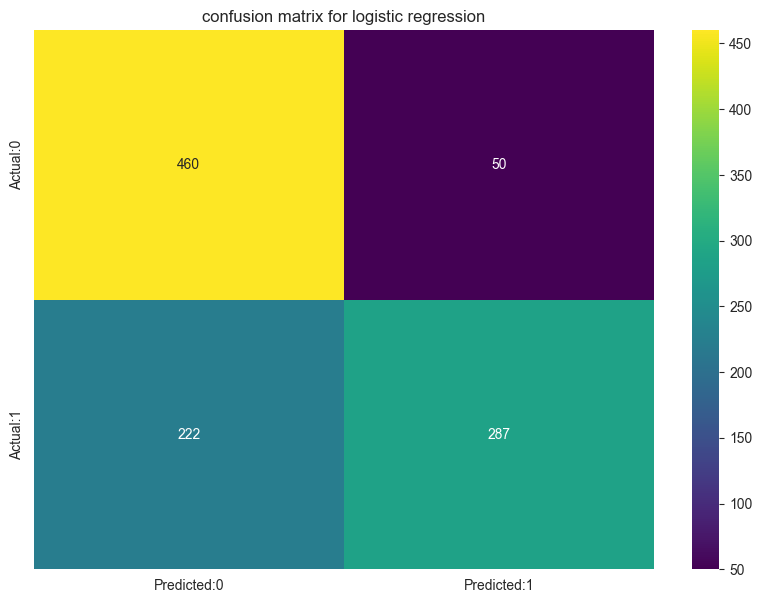

In [149]:
conf_mat = confusion_matrix(y_test,y_log_pred)
conf_matrix=pd.DataFrame(data=conf_mat,index=['Actual:0','Actual:1'],columns=['Predicted:0','Predicted:1'])
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='viridis')
plt.title('confusion matrix for logistic regression')
plt.show()

In [150]:
print(classification_report(y_test,y_log_pred))

              precision    recall  f1-score   support

           0       0.67      0.90      0.77       510
           1       0.85      0.56      0.68       509

    accuracy                           0.73      1019
   macro avg       0.76      0.73      0.73      1019
weighted avg       0.76      0.73      0.73      1019



In [151]:
log_f1_score = f1_score(y_test, y_log_pred)
print(f'The f1 score for logistic regression is {round(log_f1_score*100,2)}%')

The f1 score for logistic regression is 67.85%


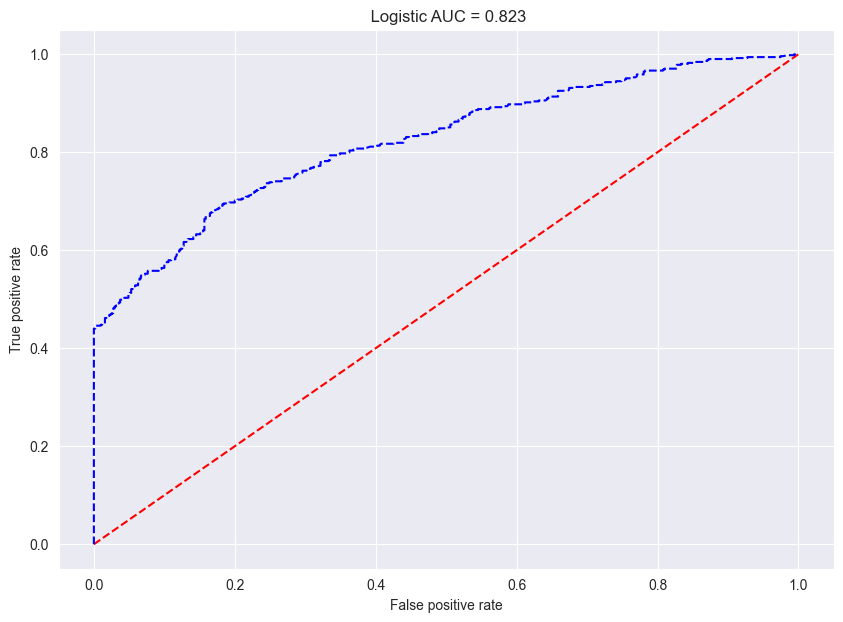

In [152]:
probability = log_classifier.predict_proba(X_test)
probability = probability[:, 1]
log_auc = roc_auc_score(y_test, probability)
fpr, tpr, thresh = roc_curve(y_test, probability)

# plot curve
sns.set_style('darkgrid')
plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], linestyle='--',color='red')
plt.plot(fpr, tpr,linestyle='--',color='blue')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f" Logistic AUC = {round(log_auc,3)}")
plt.show()

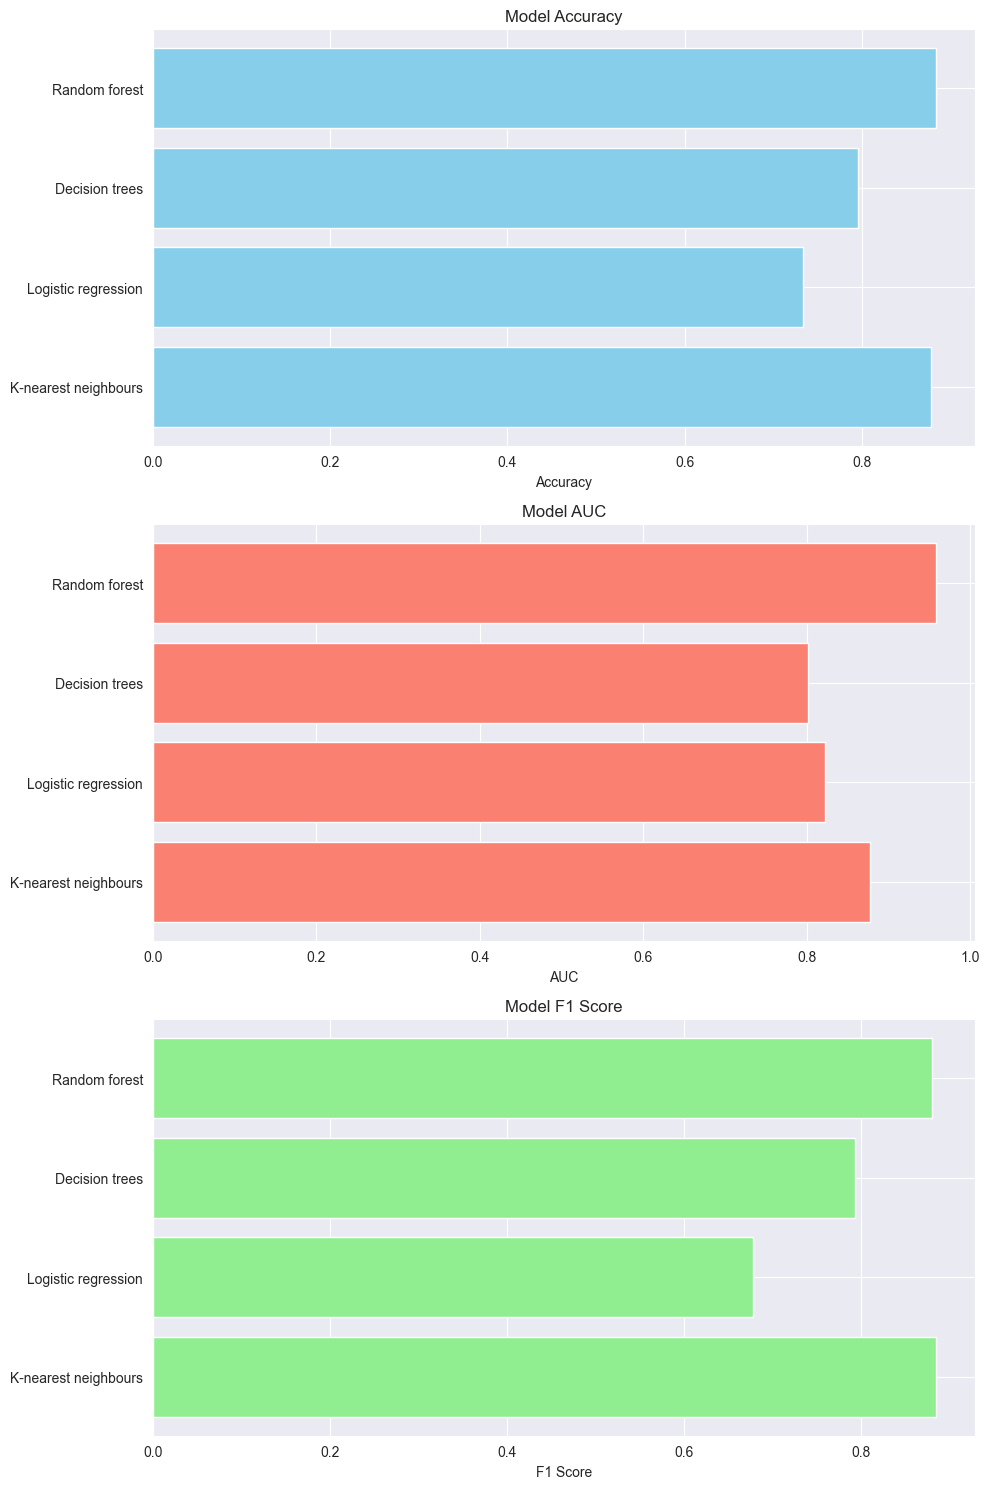

In [153]:
# Data preparation
models = [ 'K-nearest neighbours', 'Logistic regression', 'Decision trees', 'Random forest']
accuracy = [ knn_acc, log_acc, dt_acc, rf_acc]
auc = [ knn_auc, log_auc, dt_auc, rf_auc]
f1_score = [ knn_f1_score, log_f1_score, dt_f1_score, rf_f1_score]

# Define number of models
n_models = len(models)

# Set up the figure and axes
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot Accuracy
axs[0].barh(models, accuracy, color='skyblue')
axs[0].set_title('Model Accuracy')
axs[0].set_xlabel('Accuracy')

# Plot AUC
axs[1].barh(models, auc, color='salmon')
axs[1].set_title('Model AUC')
axs[1].set_xlabel('AUC')

# Plot F1 Score
axs[2].barh(models, f1_score, color='lightgreen')
axs[2].set_title('Model F1 Score')
axs[2].set_xlabel('F1 Score')


plt.tight_layout()
plt.show()

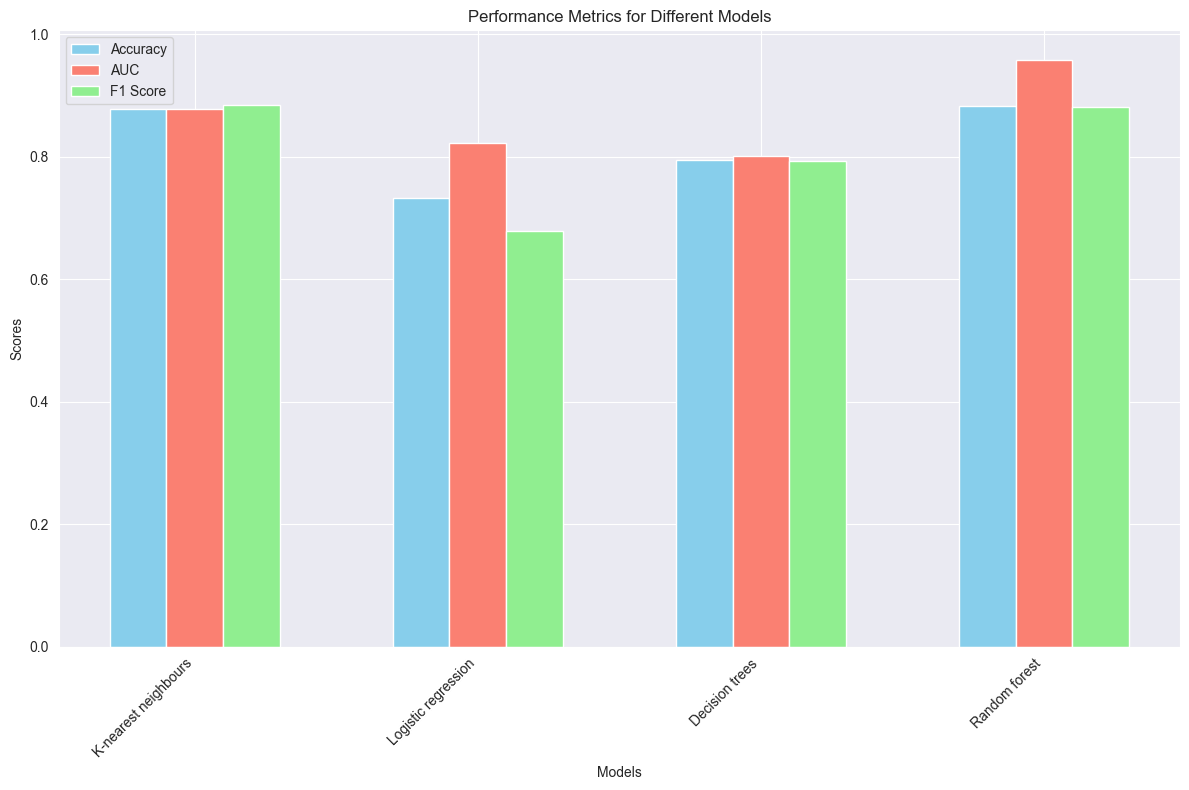

In [154]:
# Data preparation
models = ['K-nearest neighbours', 'Logistic regression', 'Decision trees', 'Random forest']
accuracy = [knn_acc, log_acc, dt_acc, rf_acc]
auc = [knn_auc, log_auc, dt_auc, rf_auc]
f1_score = [knn_f1_score, log_f1_score, dt_f1_score, rf_f1_score]


n_models = len(models)

bar_width = 0.2
index = np.arange(n_models)

fig, ax = plt.subplots(figsize=(12, 8))

bars1 = ax.bar(index - bar_width, accuracy, bar_width, label='Accuracy', color='skyblue')
bars2 = ax.bar(index, auc, bar_width, label='AUC', color='salmon')
bars3 = ax.bar(index + bar_width, f1_score, bar_width, label='F1 Score', color='lightgreen')

# Labeling
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics for Different Models')
ax.set_xticks(index)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()